In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
sns.set_context('talk')
sns.set_style('whitegrid')

In [3]:
sns.get_dataset_names()

C:\Users\ka37\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\ka37\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

Load [mtcars](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [4]:
cars = sns.load_dataset('mpg').sample(frac=1., random_state=0)

In [5]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
65,14.0,8,351.0,153.0,4129,13.0,72,usa,ford galaxie 500
132,25.0,4,140.0,75.0,2542,17.0,74,usa,chevrolet vega
74,13.0,8,302.0,140.0,4294,16.0,72,usa,ford gran torino (sw)
78,21.0,4,120.0,87.0,2979,19.5,72,europe,peugeot 504 (sw)
37,18.0,6,232.0,100.0,3288,15.5,71,usa,amc matador


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 65 to 172
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


In [8]:
cars_train = cars.iloc[:200]
cars_test = cars.iloc[200:]

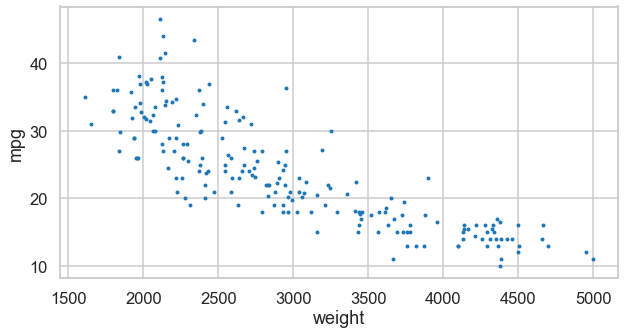

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(cars_train.weight, cars_train.mpg, s=6)
plt.xlabel('weight')
plt.ylabel('mpg');
plt.savefig('mpg_vs_weight.pdf')

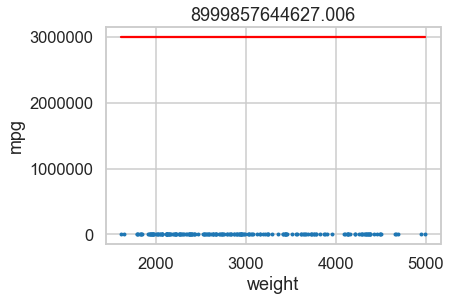

In [23]:
x = np.linspace(cars_train.weight.min(), cars_train.weight.max(), 100)
def predict(x):
    return 3000000 + 0 * x
plt.scatter(cars_train.weight, cars_train.mpg, s=6)
plt.plot(x, predict(x), color='r')
plt.xlabel('weight')
plt.ylabel('mpg');

mse_constant = np.mean((cars_train.mpg - predict(cars_train.weight)) ** 2)
plt.title(mse_constant);

In [13]:
np.mean(cars_train.mpg)

23.726

In [15]:
np.var(cars_train.mpg)

64.08332399999998

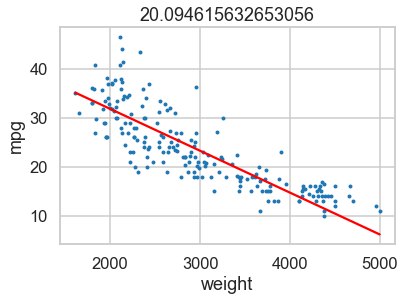

In [16]:
x = np.linspace(cars_train.weight.min(), cars_train.weight.max(), 100)
def predict(x):
    return 49 - 30/3500 * x
plt.scatter(cars_train.weight, cars_train.mpg, s=6)
plt.plot(x, predict(x), color='r')
plt.xlabel('weight')
plt.ylabel('mpg');

mse_linear = np.mean((cars_train.mpg - predict(cars_train.weight)) ** 2)
plt.title(mse_linear);

In [21]:
r_squared = 1 - (mse_linear / np.var(cars_train.mpg))

0.6864404282048012

In [77]:
np.mean(mpg_train.mpg)

23.726

If model A is better than model B, which would have the lower MSE? Lower r2?

What's the difference between the best model in terms of MSE and the best model in terms of r2?

In [94]:
model = LinearRegression()
model.fit(mpg_train.weight.values.reshape(-1, 1), mpg_train.mpg)
model.intercept_, model.coef_
#model.predict(x.reshape(-1, 1))

(47.118793371735805, array([-0.00788878]))

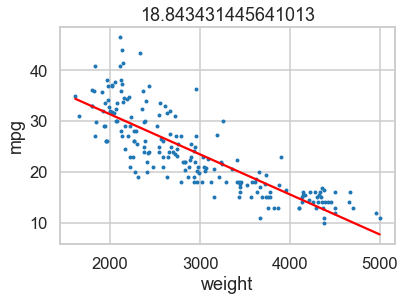

In [95]:
x = np.linspace(mpg_train.weight.min(), mpg_train.weight.max(), 100)
def predict(x):
    return 47.12 - .007888 * x
plt.scatter(mpg_train.weight, mpg_train.mpg, s=6)
plt.plot(x, predict(x), color='r')
plt.xlabel('weight')
plt.ylabel('mpg');

mse_linear = np.mean((mpg.mpg - predict(mpg.weight)) ** 2)
plt.title(mse_linear);

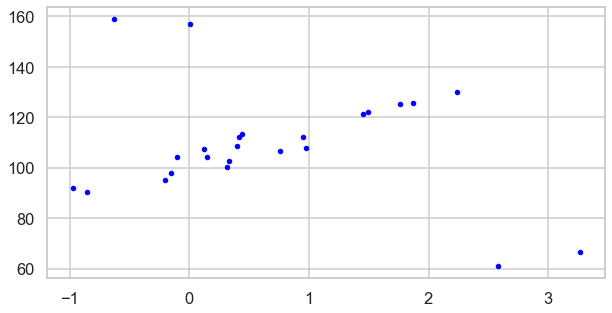

In [97]:
# From https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html#sphx-glr-auto-examples-linear-model-plot-huber-vs-ridge-py
from sklearn.datasets import make_regression

# Generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0,
                       bias=100.0)

# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'b.')
plt.savefig('outliers.pdf')